In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
test = pd.read_csv("test.csv", parse_dates=["datetime"]) # 문자열을 시간 객체로 자료형 변경
train = pd.read_csv("train.csv", parse_dates=["datetime"])

In [38]:
display(train)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [39]:
display(train.head(), test.head()) # parameter = 갯수 수정 가능

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [40]:
train["hour"] = train["datetime"].dt.hour
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["weekday"] = train["datetime"].dt.weekday

In [41]:
test["hour"] = test["datetime"].dt.hour
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["weekday"] = test["datetime"].dt.weekday

<AxesSubplot: >

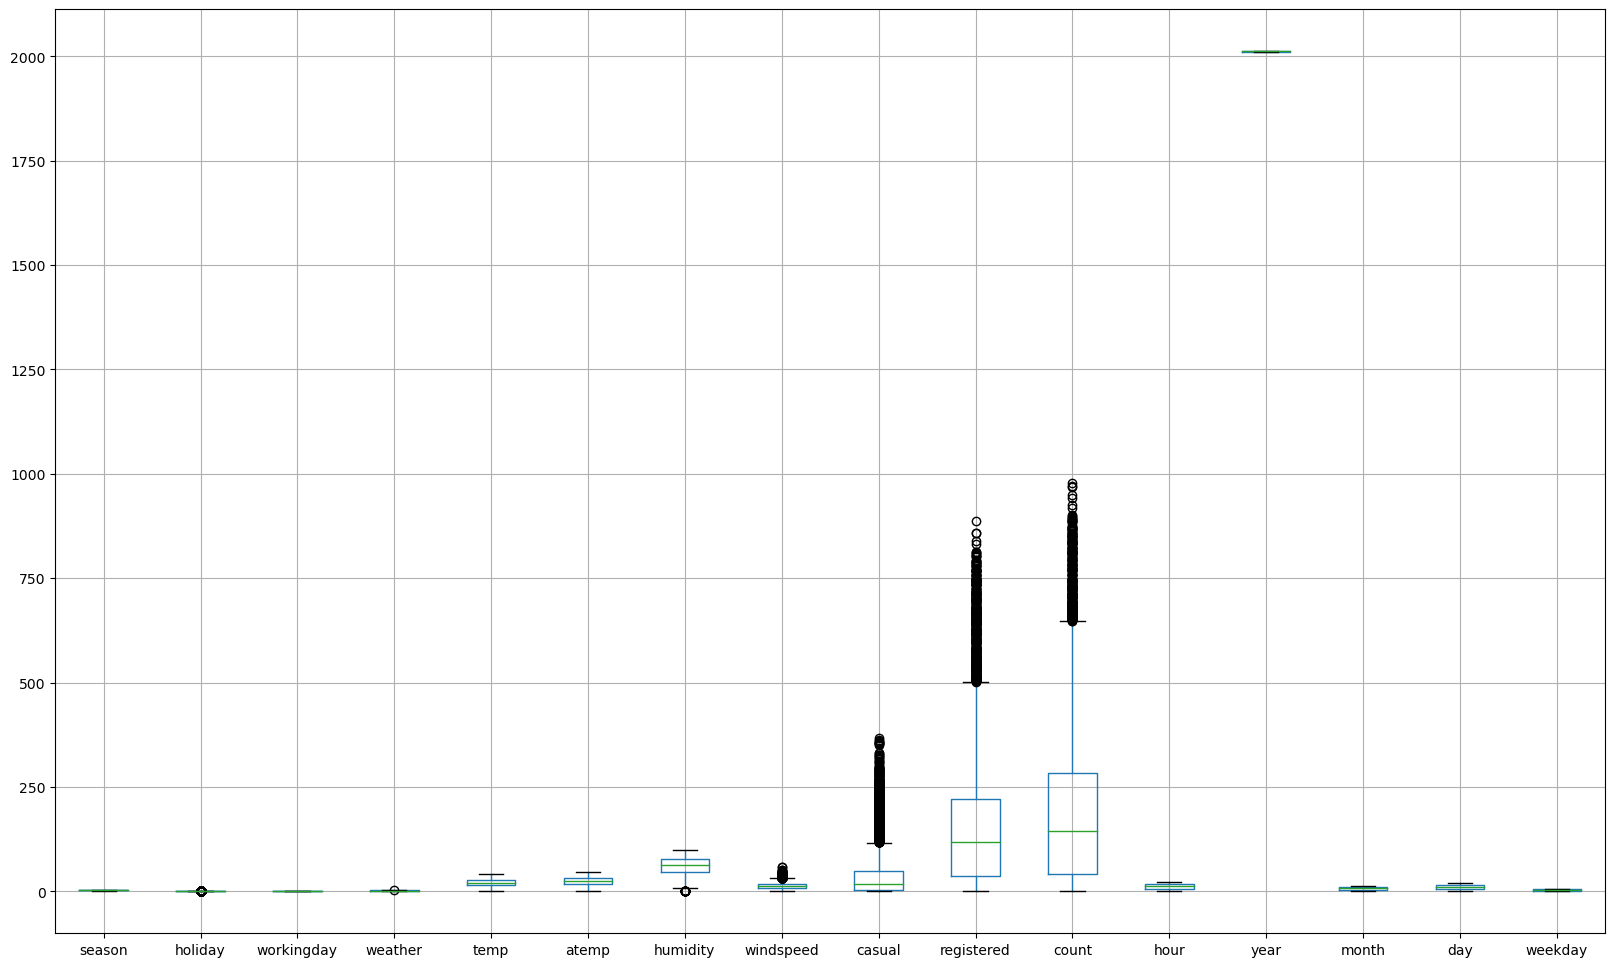

In [42]:
plt.figure(figsize=(20,12)) # size 조절
train.boxplot() # boxplot : data가 숫자일 때 좋음, data 분포를 파악하기 위해 사용

In [43]:
# dataframe의 정보, 숫자형이 아닌 모든 자료형 - object로 표현

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int64         
 13  year        10886 non-null  int64         
 14  month       10886 non-null  int64         
 15  day         10886 non-null  int64         
 16  weekday     10886 non-

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   hour        6493 non-null   int64         
 10  year        6493 non-null   int64         
 11  month       6493 non-null   int64         
 12  day         6493 non-null   int64         
 13  weekday     6493 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 710.3 KB


In [45]:
# Check duplicated, pandas의 최고 장점
sum(train.duplicated()), sum(test.duplicated())

(0, 0)

1. Data Load & Check
2. EDA
3. Feature Engineering
4. Modeling & make submission

In [46]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,day,weekday
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,2011.501929,6.521495,9.992559,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,0.500019,3.444373,5.476608,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,2011.000000,4.000000,5.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,2012.000000,7.000000,10.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,2012.000000,10.000000,15.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,2012.000000,12.000000,19.000000,6.000000


In [47]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,month,day,weekday
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157,11.555367,2011.503619,6.565070,25.224550,3.007239
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151,6.912526,0.500025,3.429462,3.339411,1.997714
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000,0.000000,2011.000000,1.000000,20.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500,6.000000,2011.000000,4.000000,22.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400,12.000000,2012.000000,7.000000,25.000000,3.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900,18.000000,2012.000000,10.000000,28.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600,23.000000,2012.000000,12.000000,31.000000,6.000000


In [48]:
train.groupby("holiday")["count"].mean()

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

In [49]:
train.groupby("year")["count"].mean() # data가 이상적일 경우

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64

In [50]:
train.groupby("weekday")["count"].median()

weekday
0    146.0
1    146.0
2    136.0
3    155.0
4    167.0
5    141.5
6    119.0
Name: count, dtype: float64

<AxesSubplot: xlabel='year', ylabel='count'>

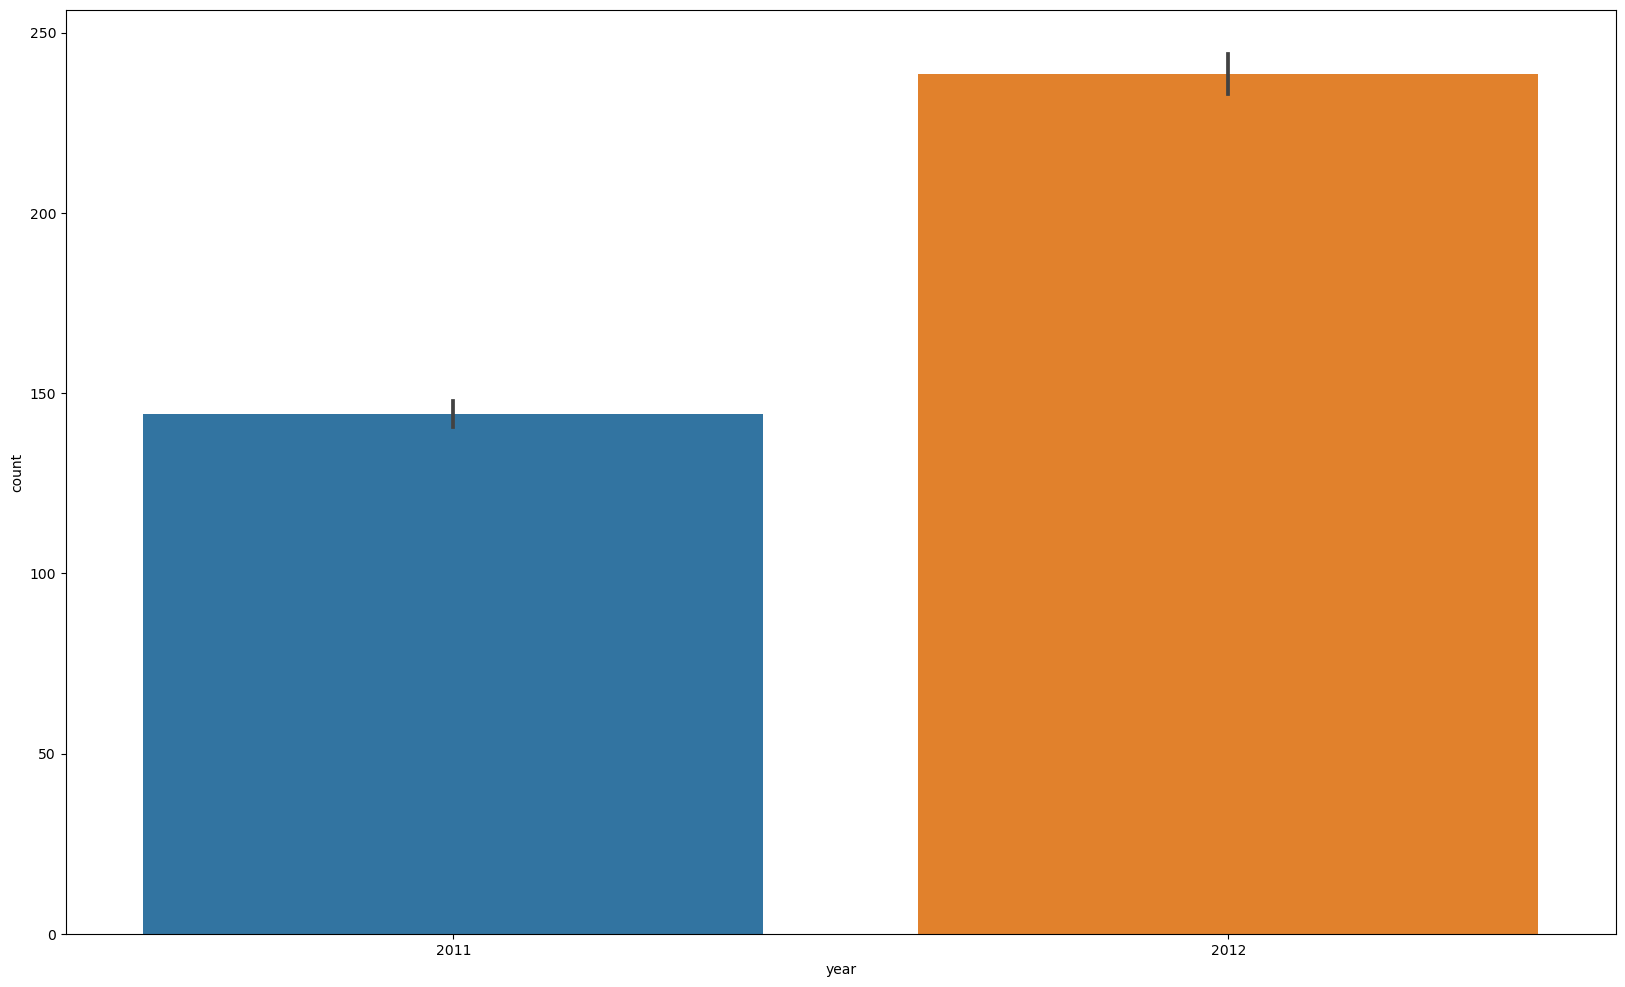

In [54]:
plt.figure(figsize=(20,12))
sns.barplot(x = train["year"], y = train["count"])

<AxesSubplot: xlabel='month', ylabel='count'>

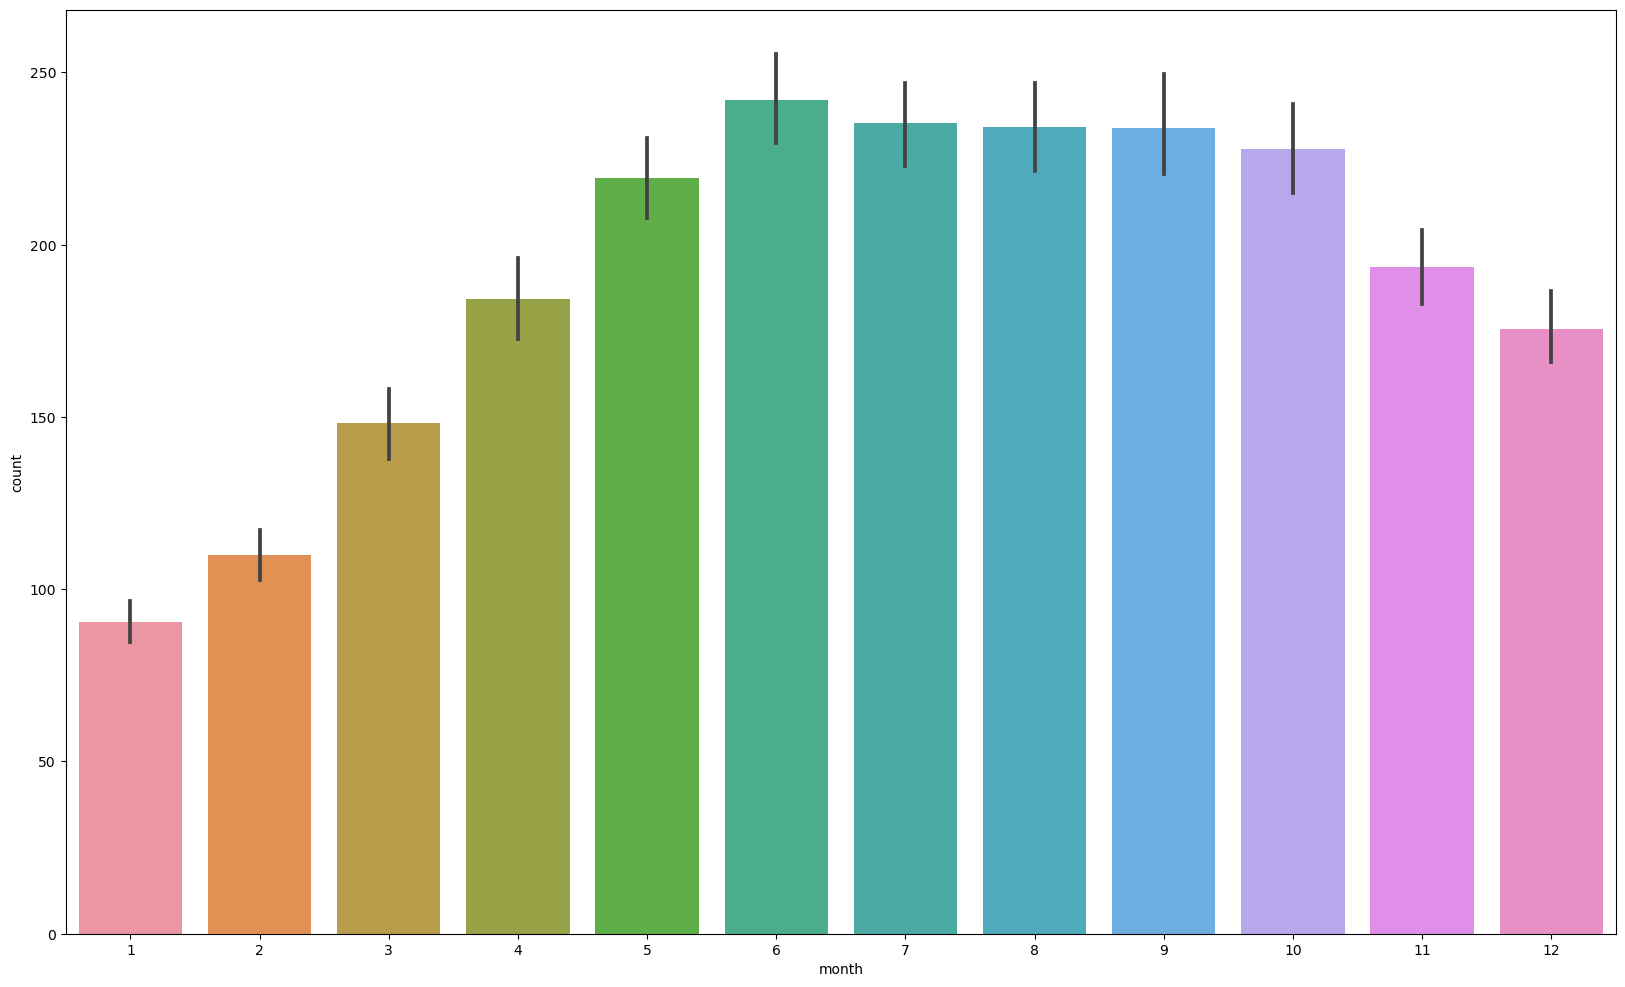

In [55]:
plt.figure(figsize=(20,12))
sns.barplot(x = train["month"], y = train["count"])

<AxesSubplot: xlabel='weekday', ylabel='count'>

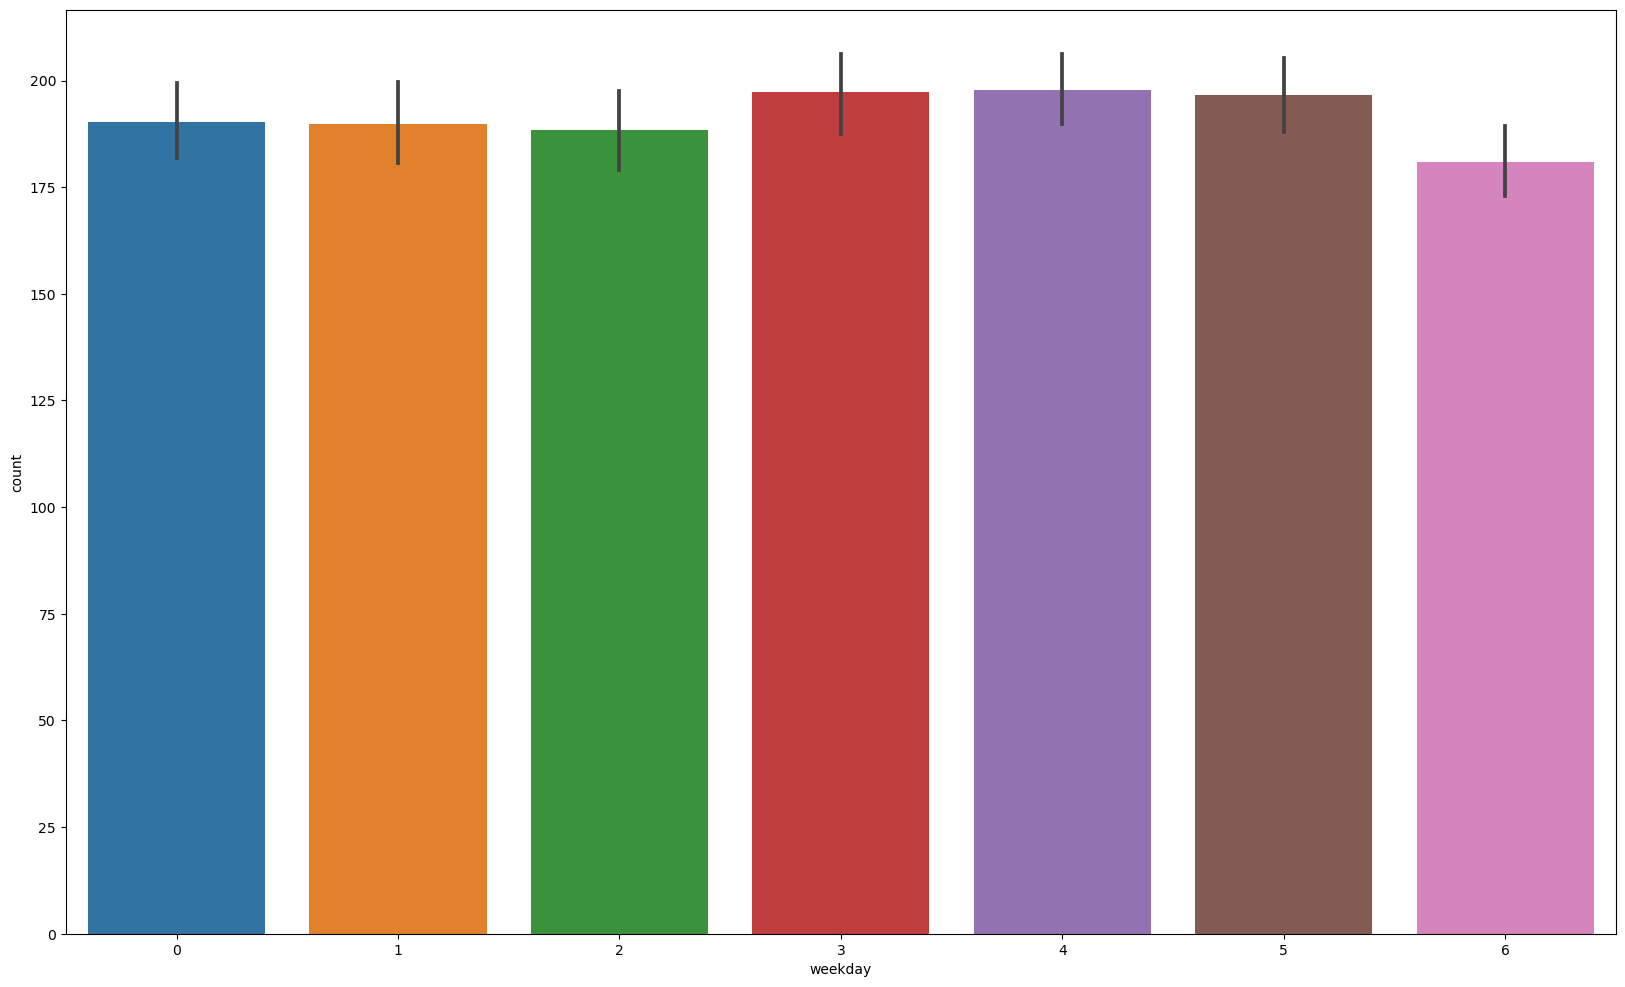

In [56]:
plt.figure(figsize=(20,12))
sns.barplot(x = train["weekday"], y = train["count"])

<AxesSubplot: xlabel='day', ylabel='count'>

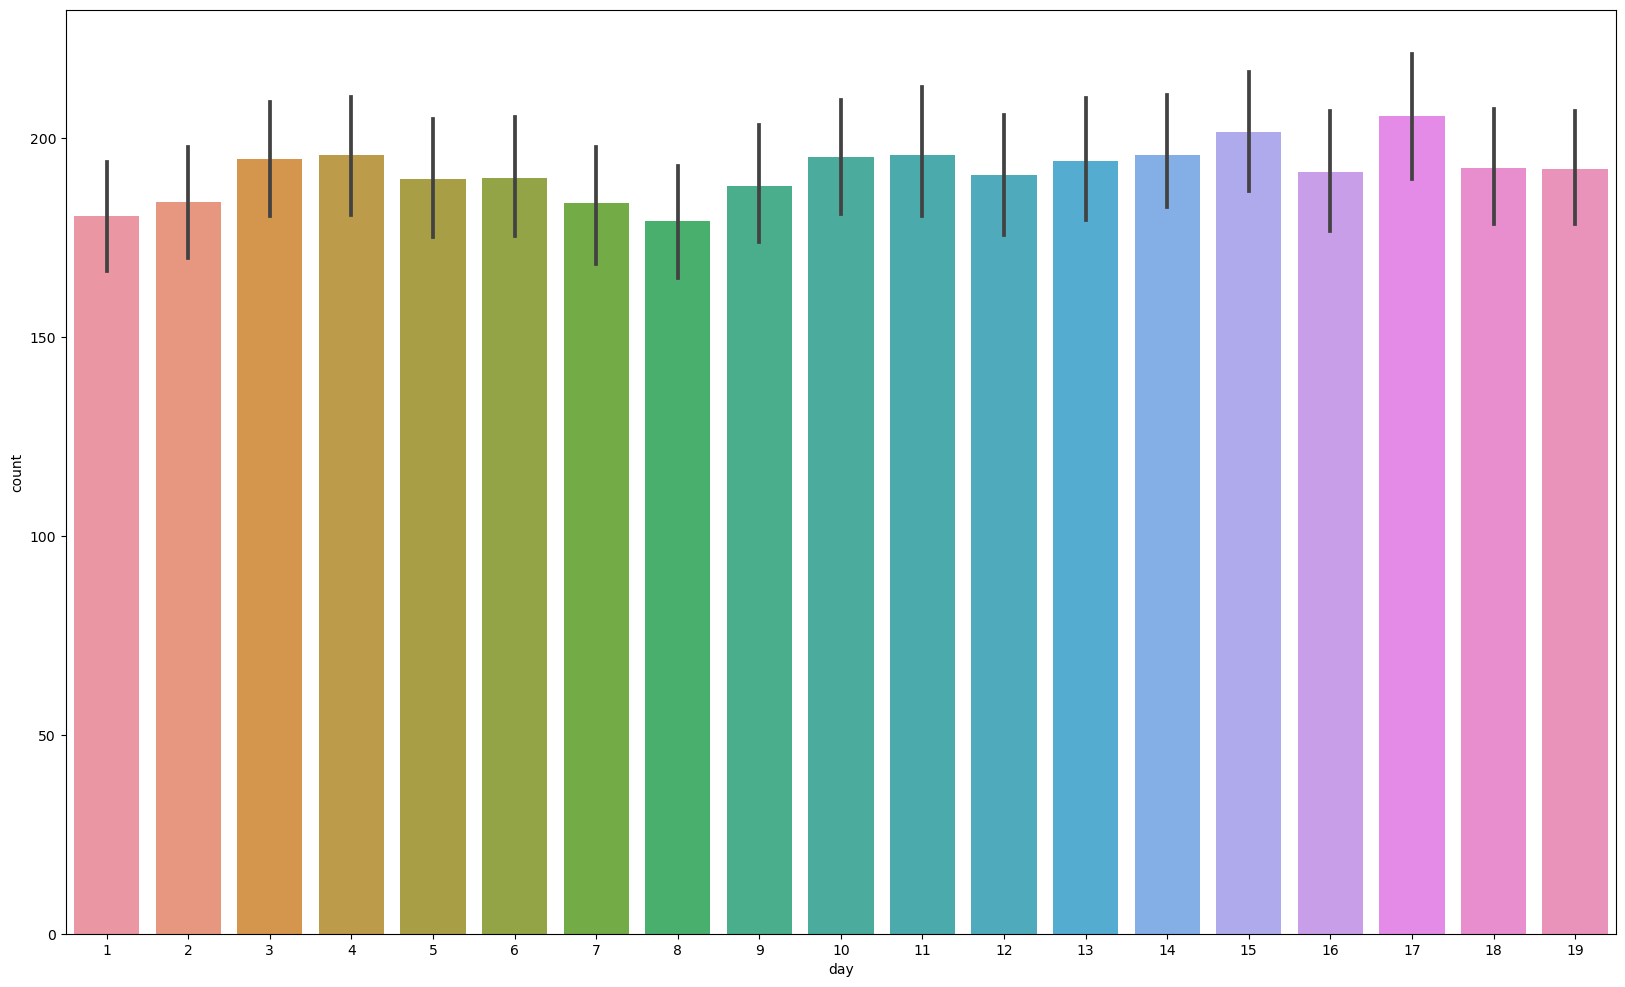

In [63]:
plt.figure(figsize=(20,12))
sns.barplot(x = train["day"], y = train["count"])

In [62]:
train["day"].describe()

count    10886.000000
mean         9.992559
std          5.476608
min          1.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         19.000000
Name: day, dtype: float64

In [61]:
test["day"].describe()

count    6493.000000
mean       25.224550
std         3.339411
min        20.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        31.000000
Name: day, dtype: float64

day 칼럼에는 1~19일 밖에 없는 문제가 있다. train에는 1~19일, test에는 20~31일로 나뉘어 있다. 버리자 ! 

<AxesSubplot: xlabel='hour', ylabel='count'>

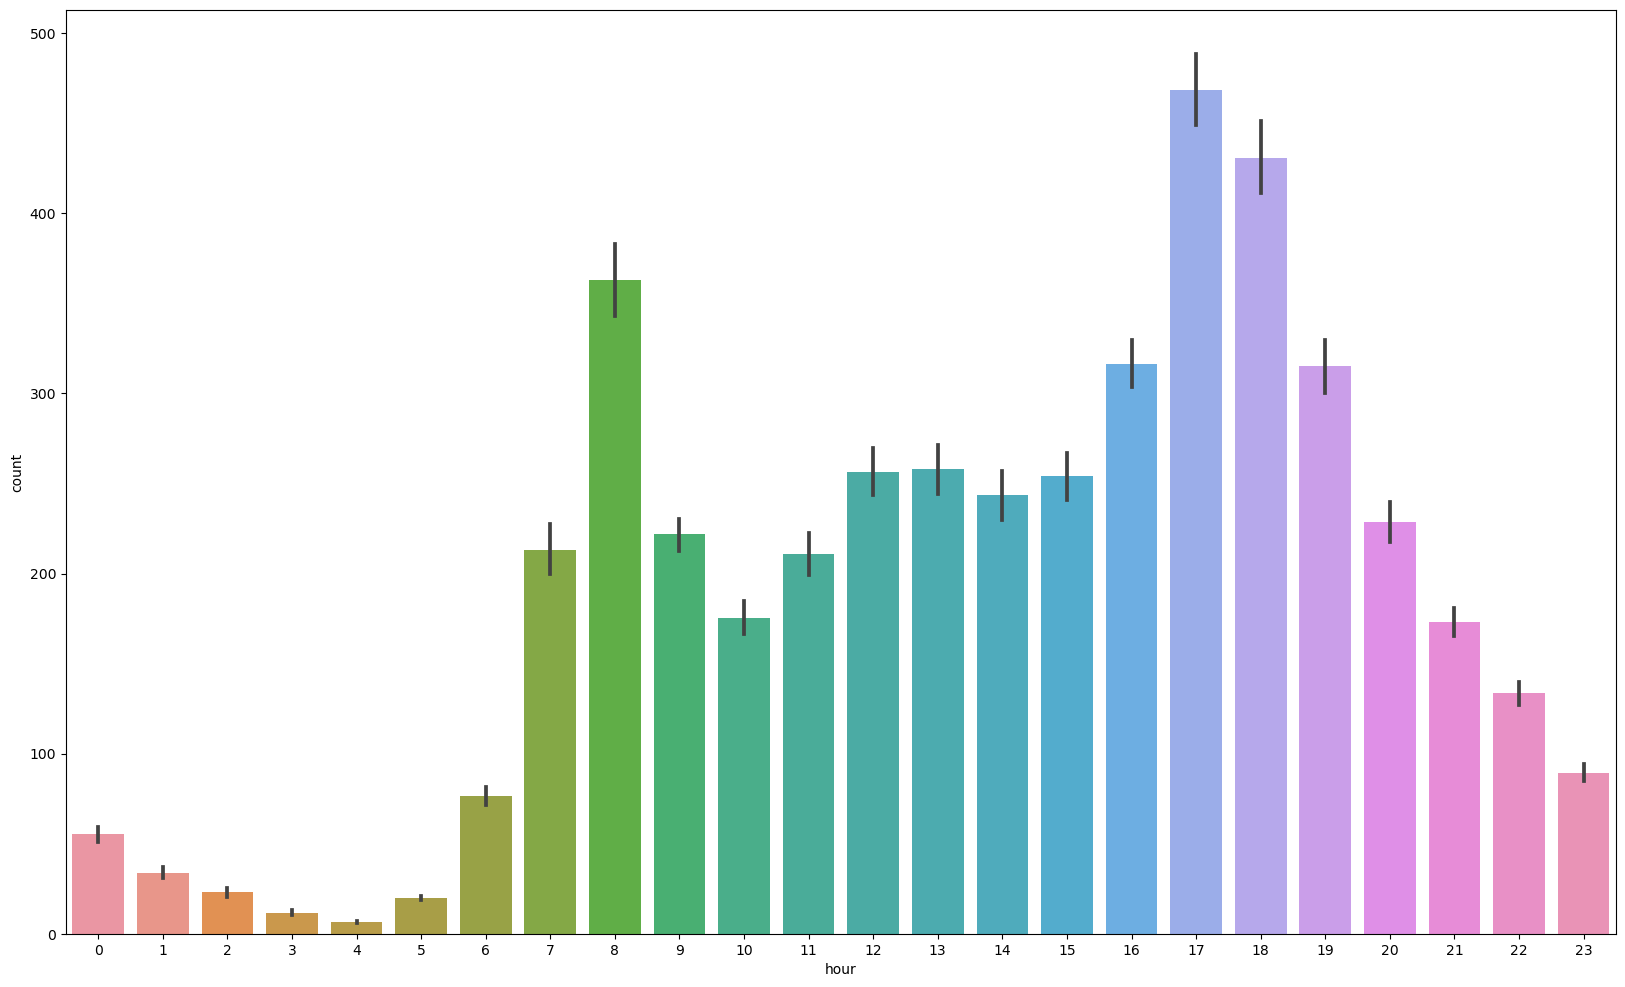

In [66]:
plt.figure(figsize=(20,12))
sns.barplot(x = train["hour"], y = train["count"])

<AxesSubplot: xlabel='hour', ylabel='count'>

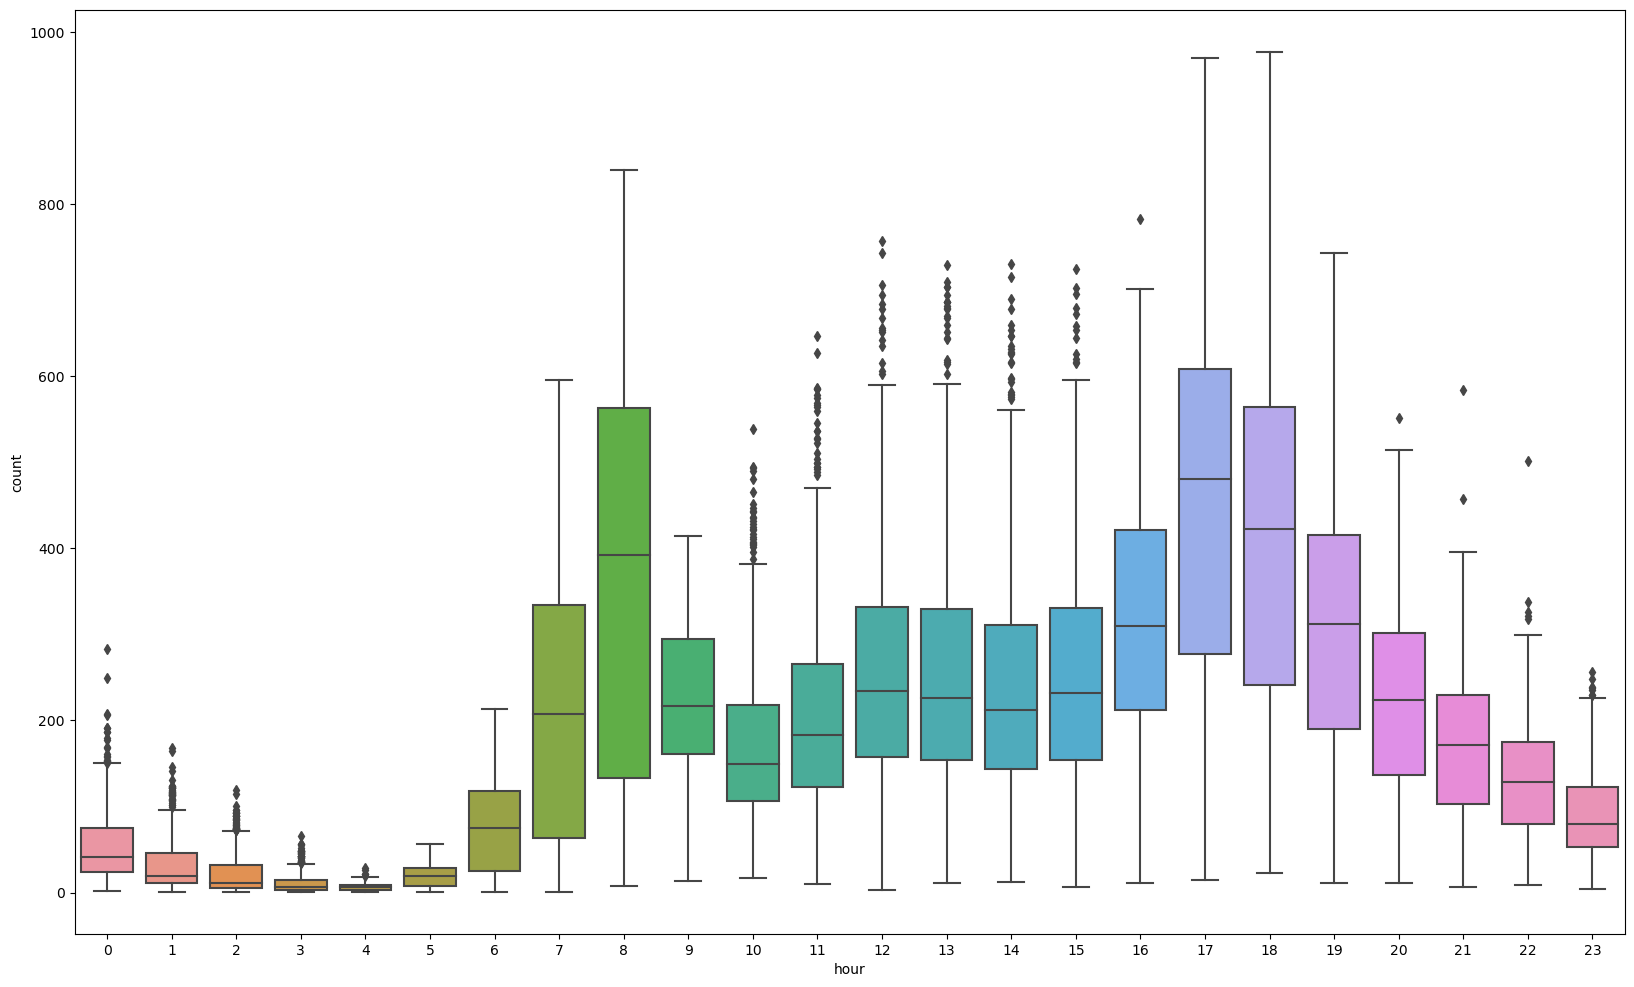

In [69]:
plt.figure(figsize=(20,12))
sns.boxplot(x = train["hour"], y = train["count"])

<AxesSubplot: xlabel='hour', ylabel='count'>

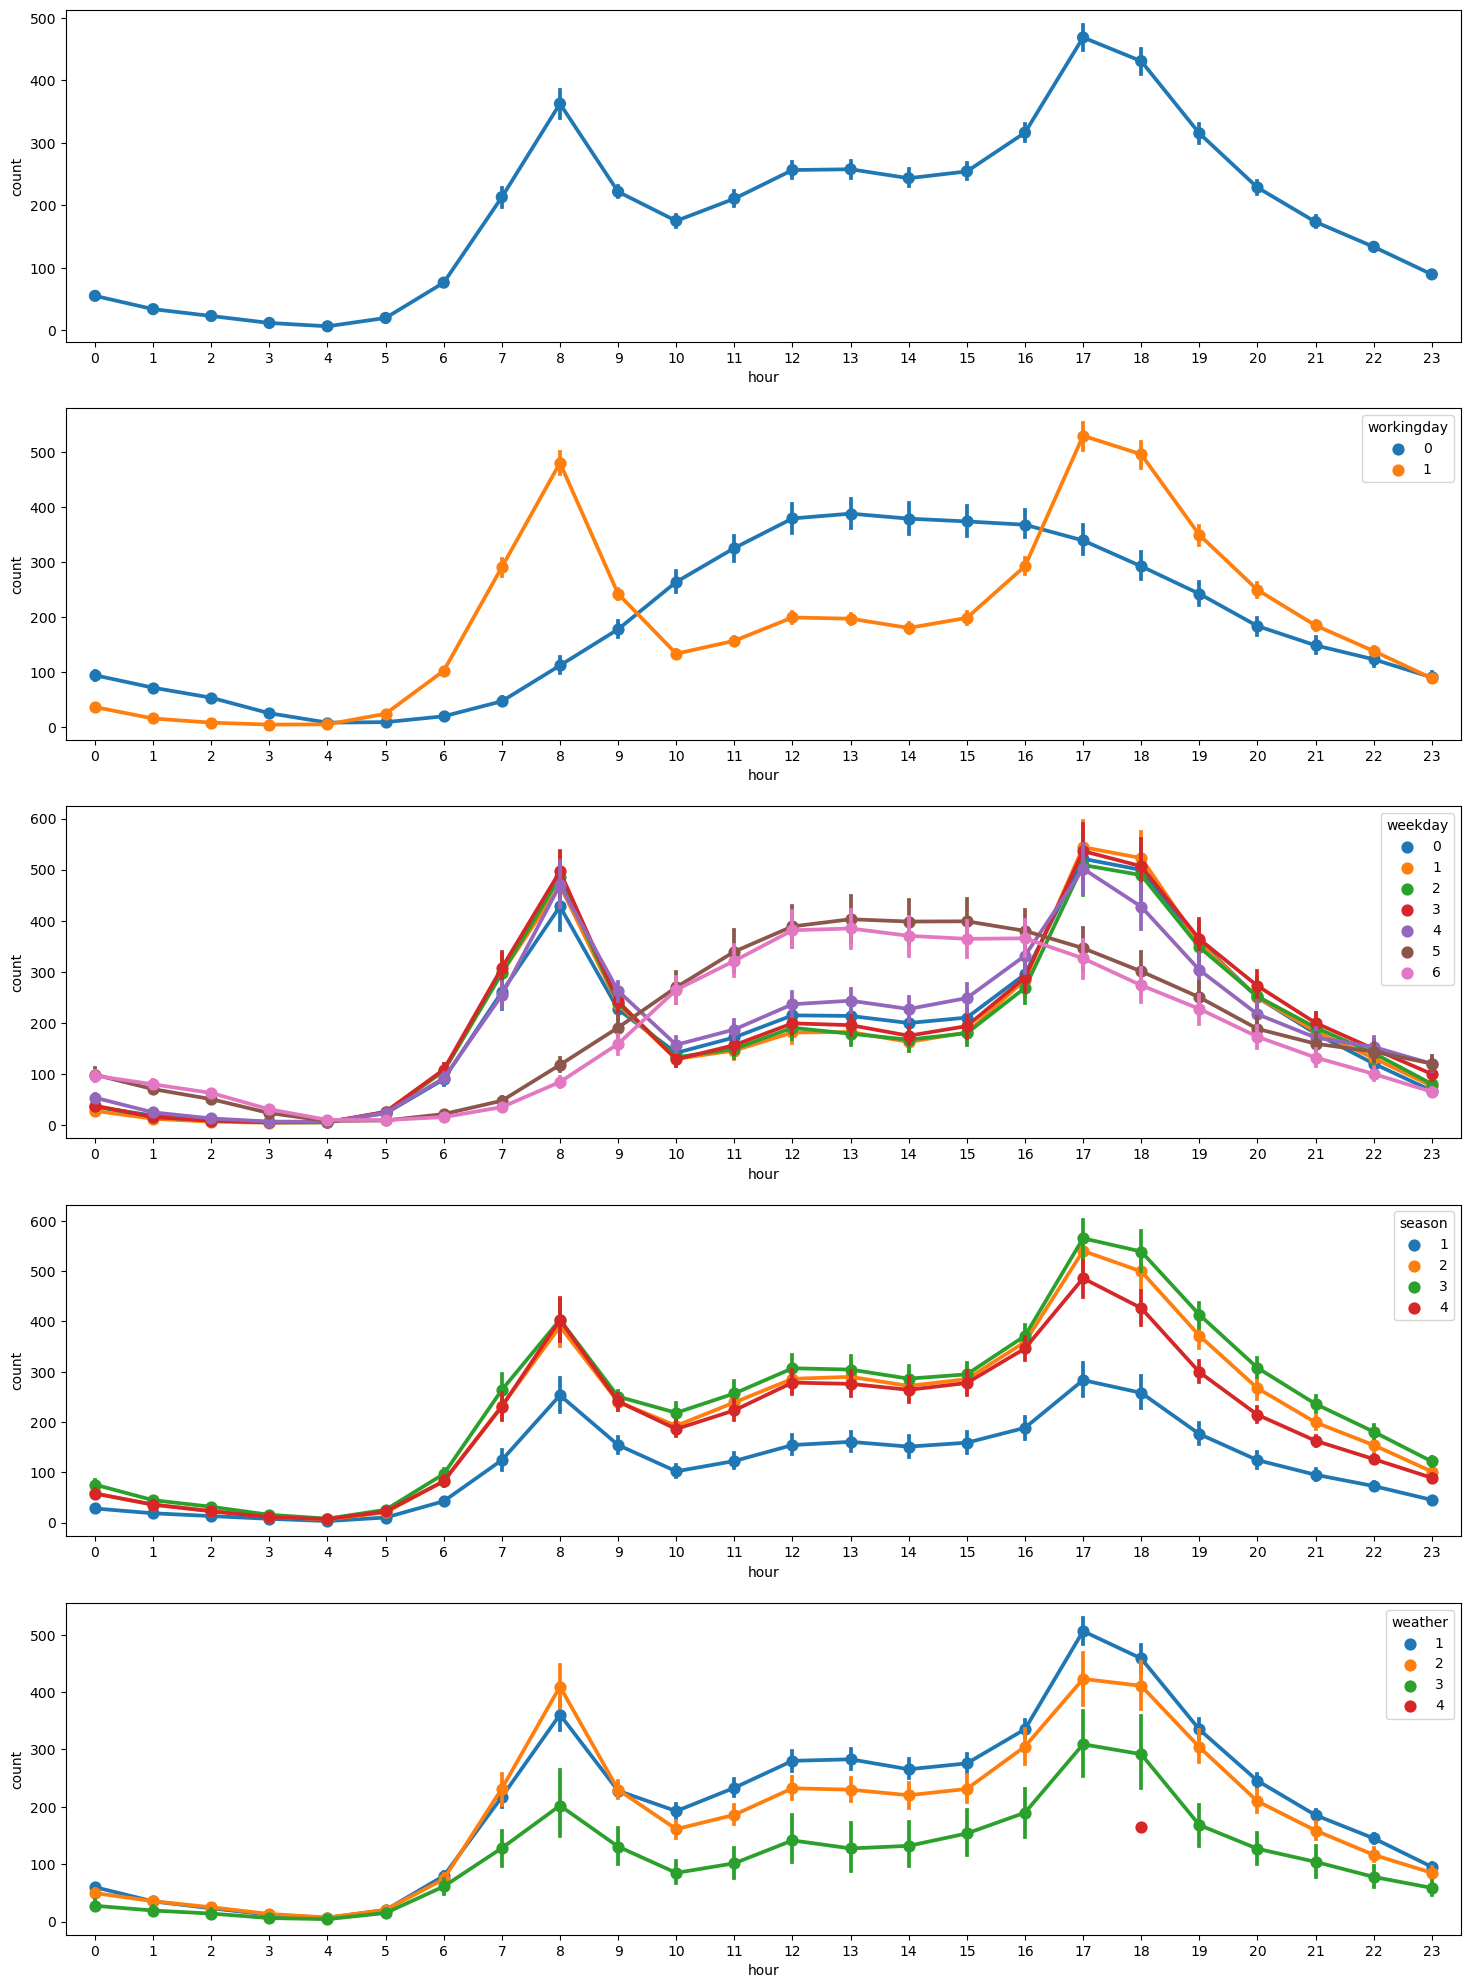

In [72]:
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18, 25)

sns.pointplot(data = train, x = 'hour', y = 'count', ax = ax1)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday', ax = ax2)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weekday', ax = ax3)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'season', ax = ax4)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather', ax = ax5)

In [73]:
weekend = train[train["workingday"] == 0]

In [74]:
weekday = train[train["workingday"] == 1]

<AxesSubplot: xlabel='hour', ylabel='count'>

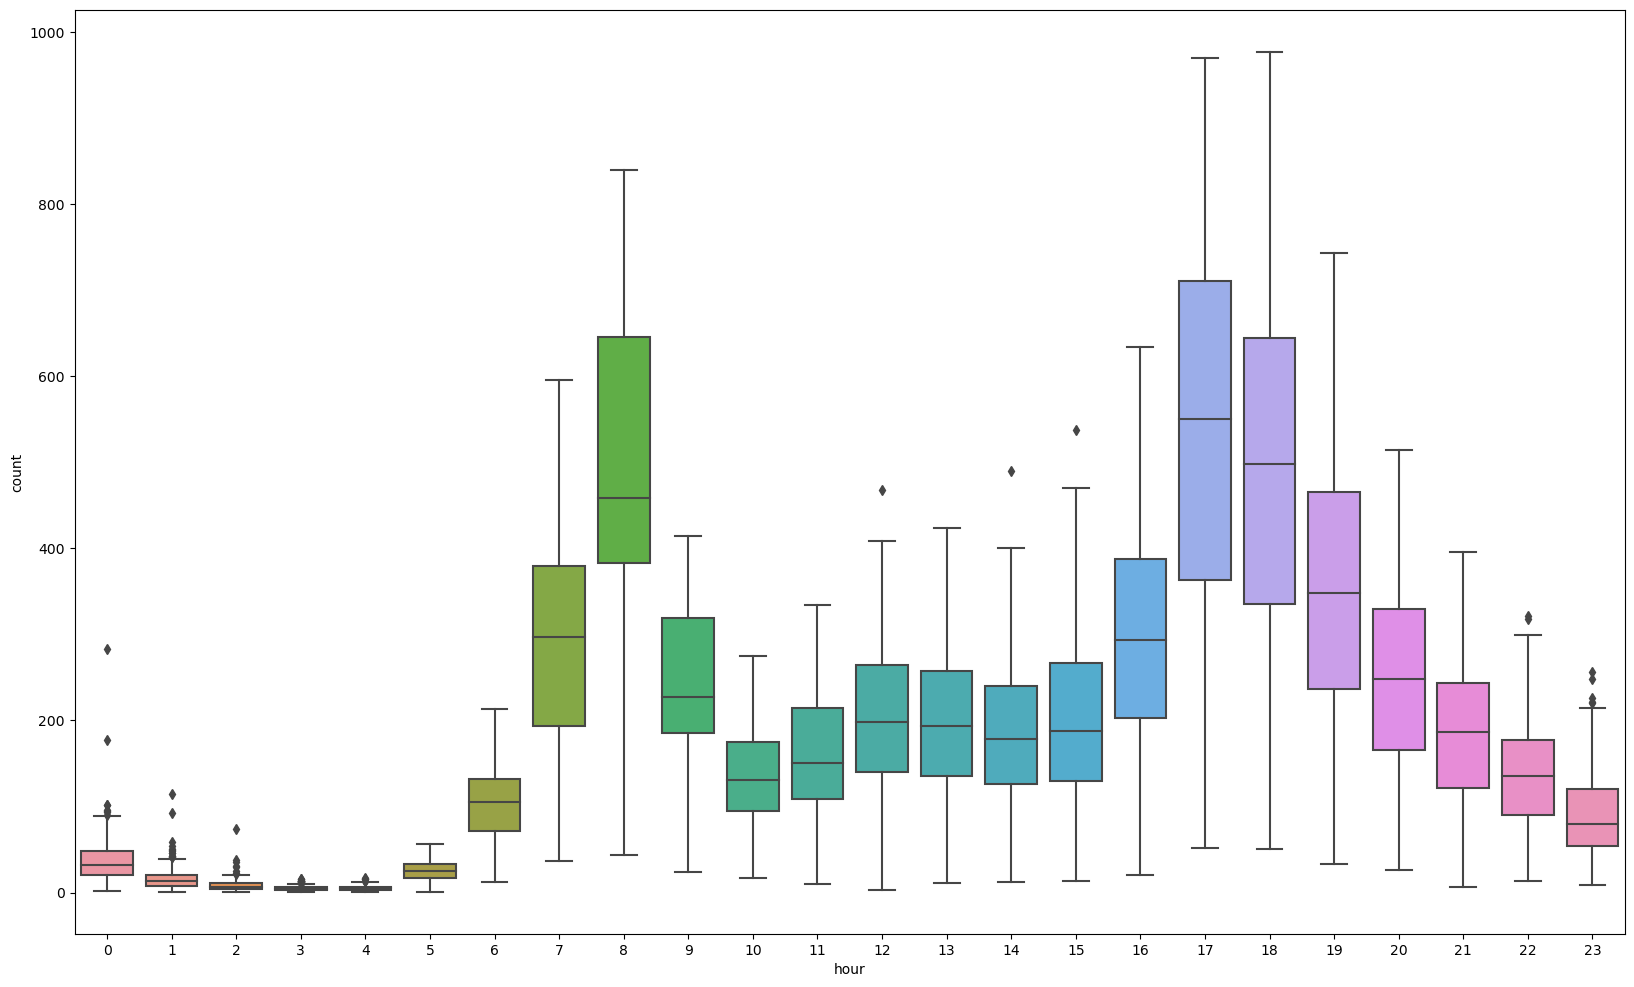

In [76]:
plt.figure(figsize=(20,12))
sns.boxplot(x = train["hour"], y = weekday["count"])

<AxesSubplot: xlabel='hour', ylabel='count'>

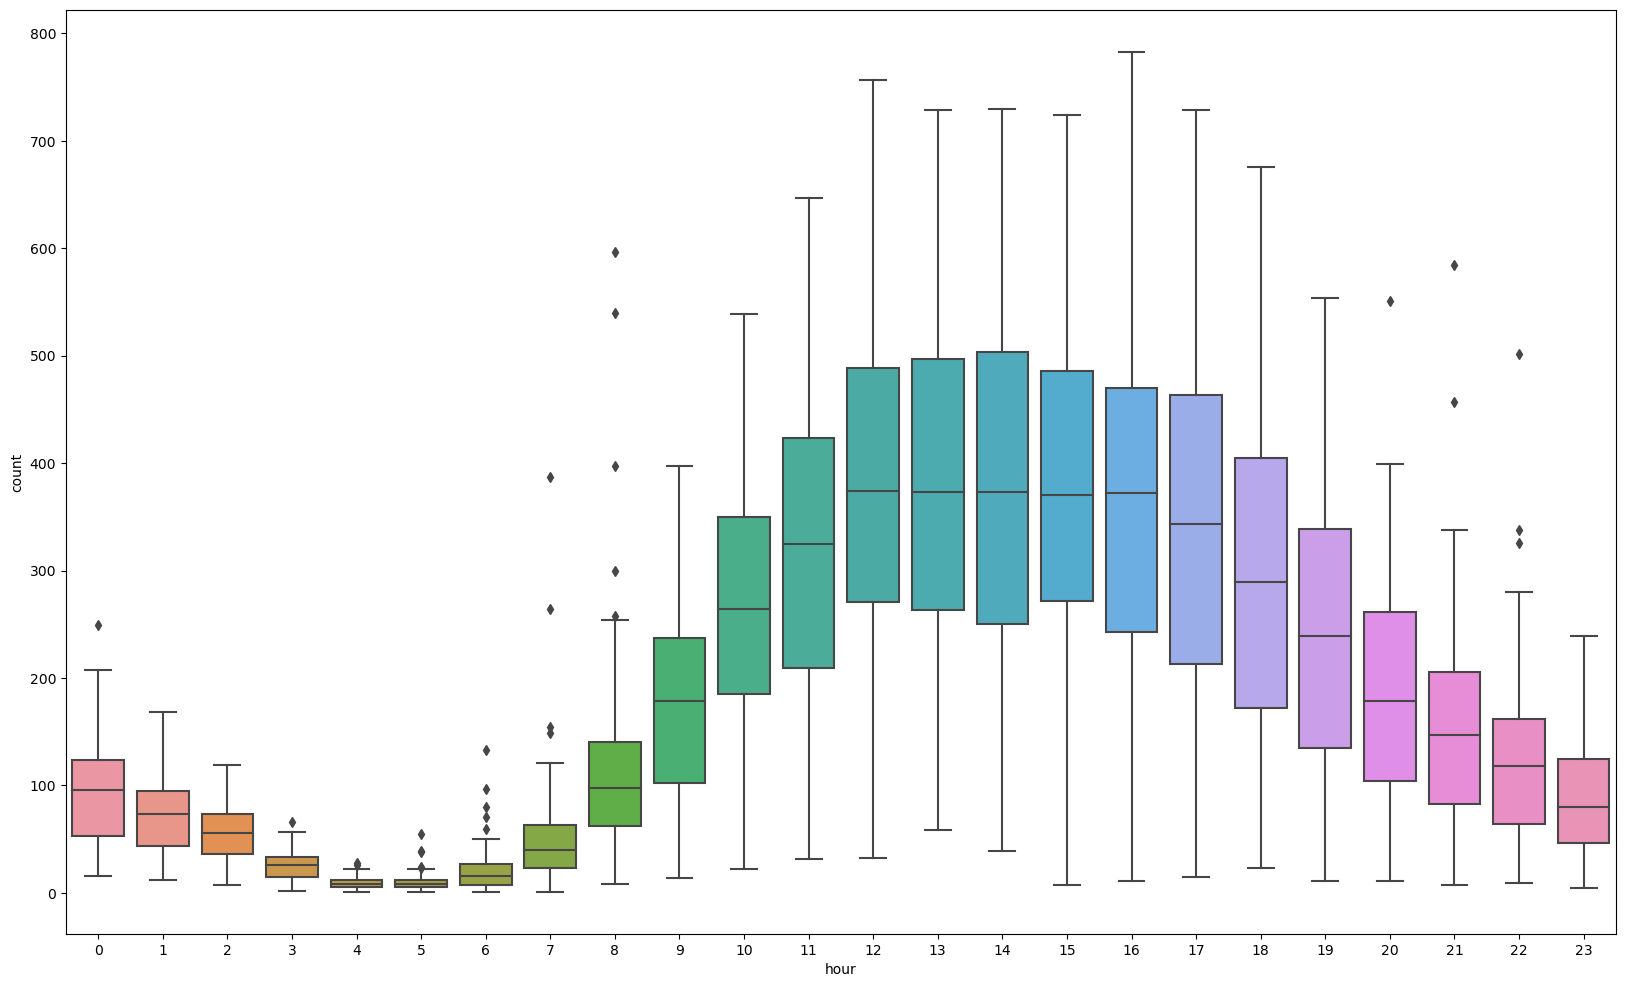

In [77]:
plt.figure(figsize=(20,12))
sns.boxplot(x = train["hour"], y = weekend["count"])

<AxesSubplot: xlabel='temp', ylabel='count'>

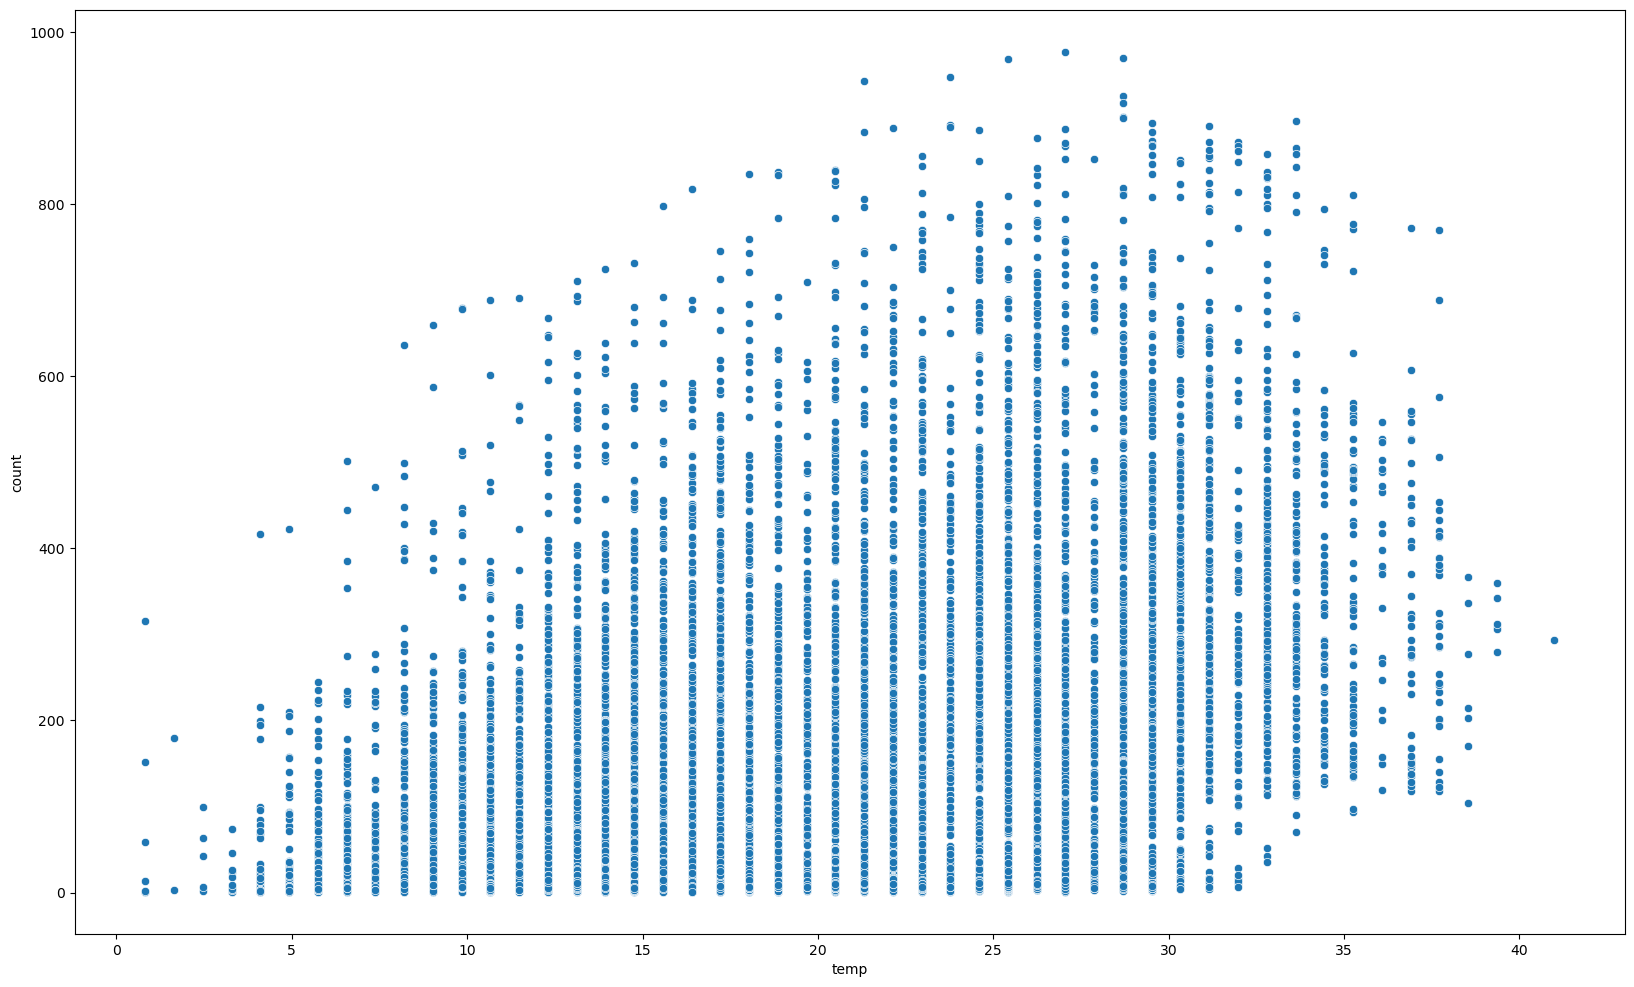

In [78]:
plt.figure(figsize=(20,12))
sns.scatterplot(x = train["temp"], y = train["count"])

<AxesSubplot: xlabel='atemp', ylabel='count'>

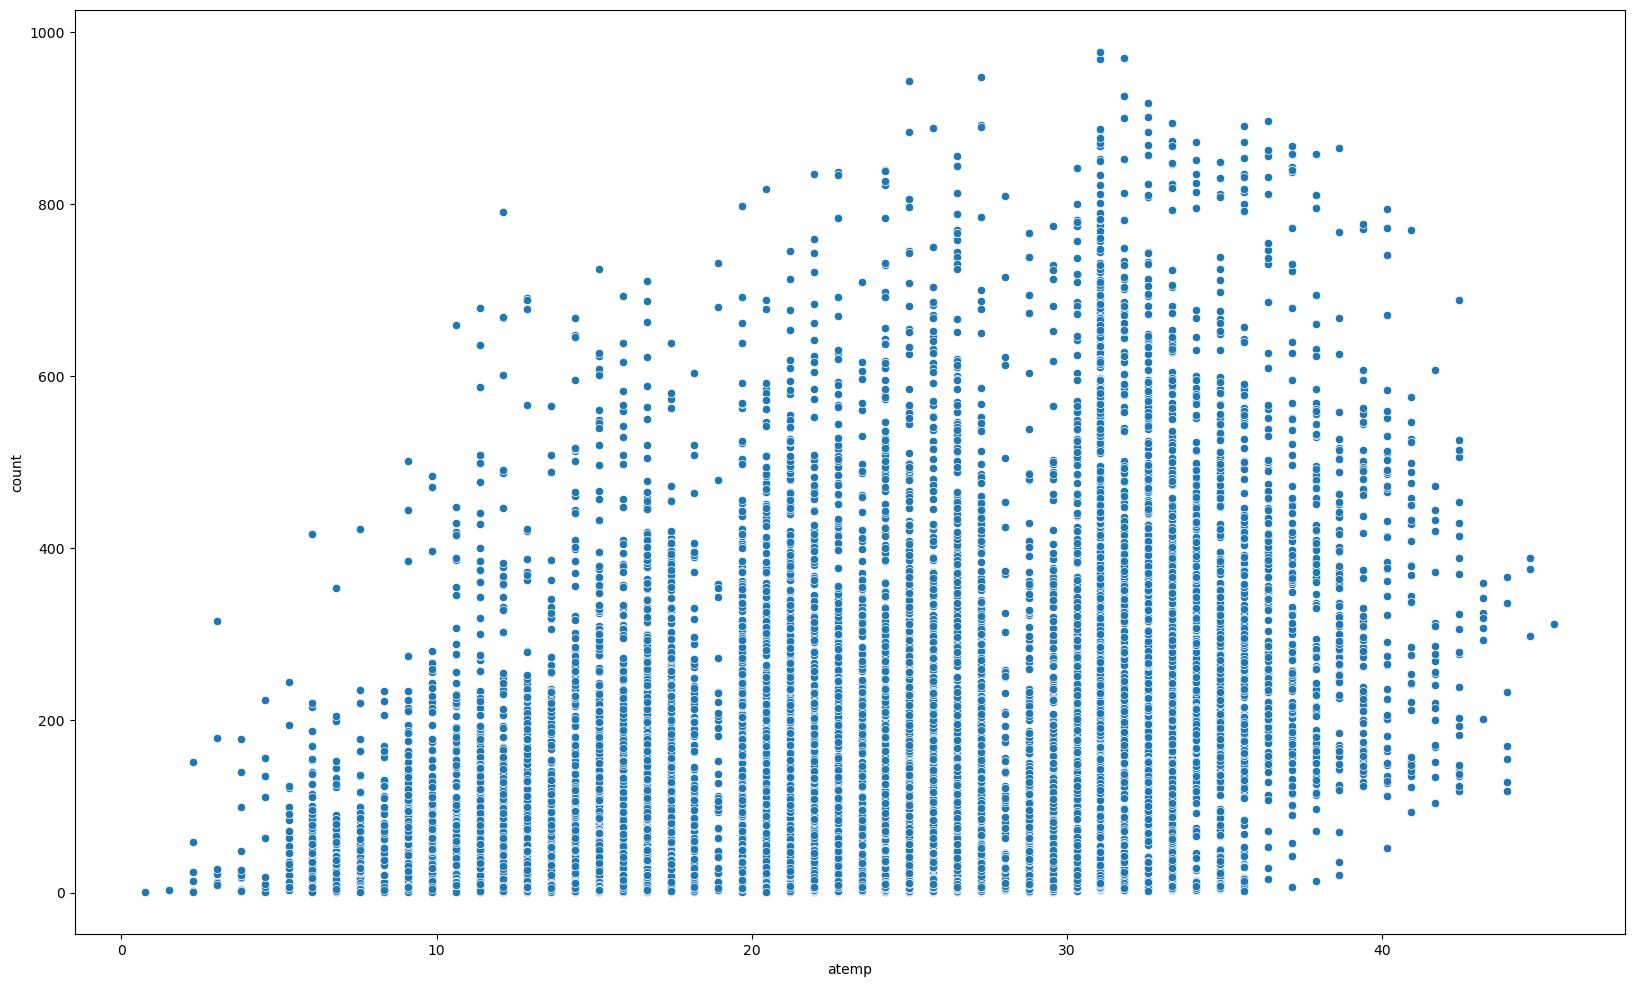

In [79]:
plt.figure(figsize=(20,12))
sns.scatterplot(x = train["atemp"], y = train["count"])

<AxesSubplot: xlabel='humidity', ylabel='count'>

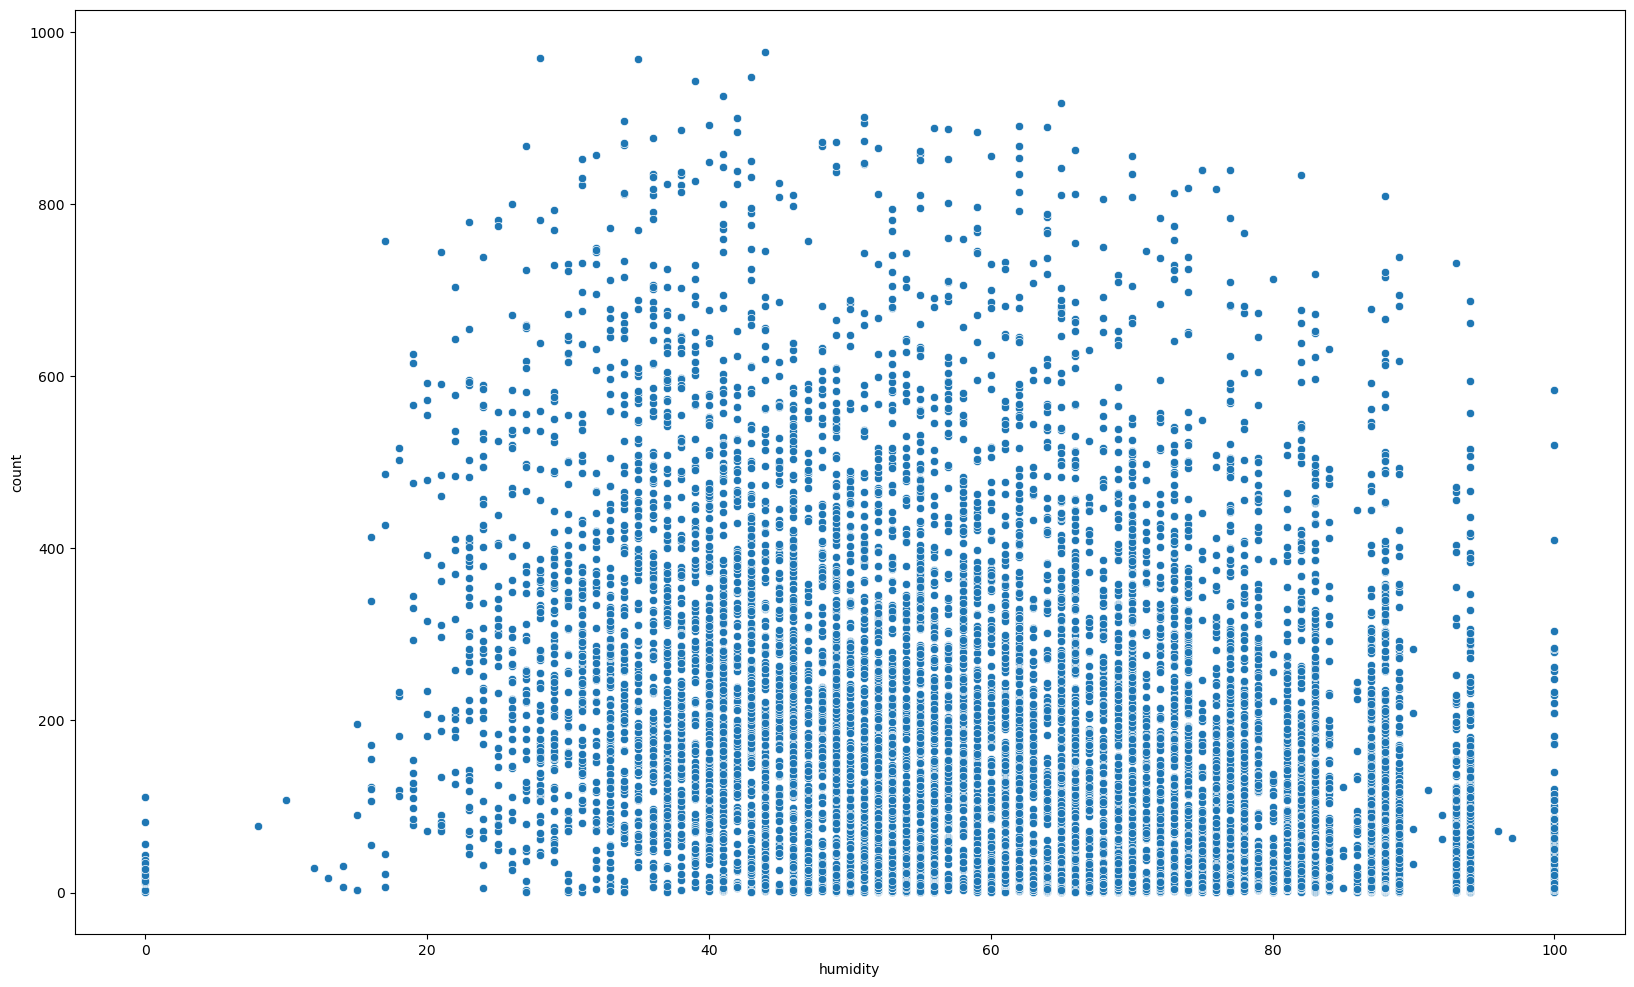

In [80]:
plt.figure(figsize=(20,12))
sns.scatterplot(x = train["humidity"], y = train["count"])

<AxesSubplot: xlabel='windspeed', ylabel='count'>

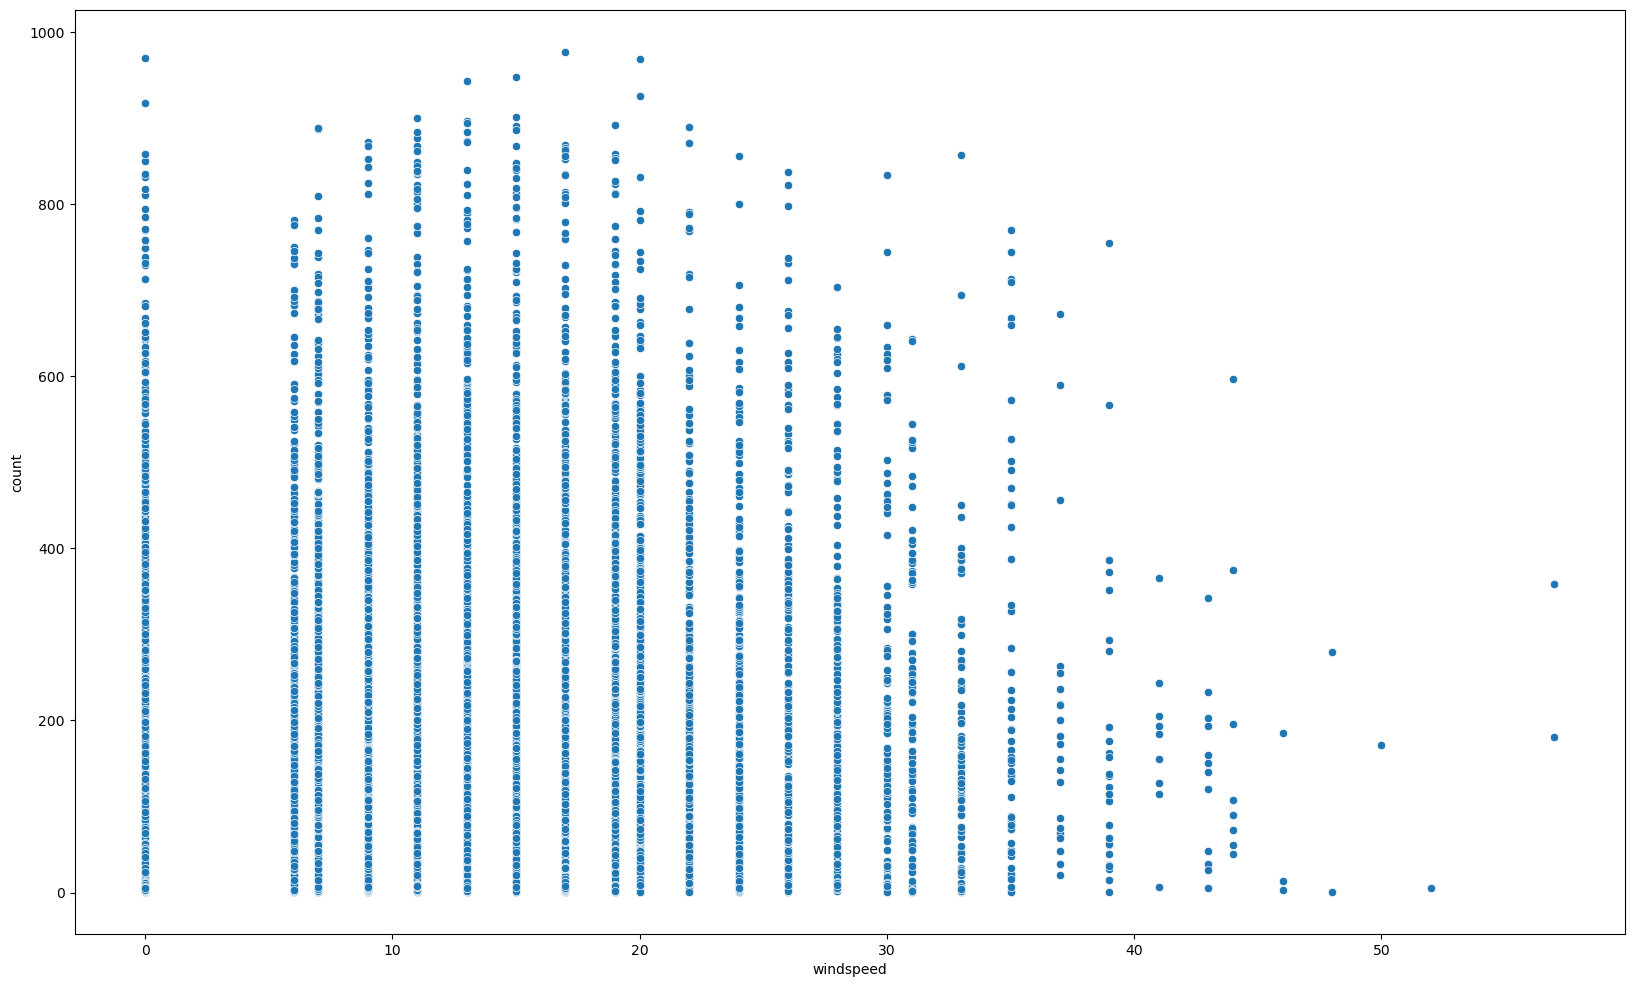

In [81]:
plt.figure(figsize=(20,12))
sns.scatterplot(x = train["windspeed"], y = train["count"])

In [82]:
corr = train.corr()['count'].sort_values()

# Display correlations, 절댓값이 크면 count에 영향을 미친다는 의미, 보통 0.1만 넘어도 쓸만한 것
print('상관계수:\n', corr)

상관계수:
 humidity     -0.317371
weather      -0.128655
holiday      -0.005393
weekday      -0.002283
workingday    0.011594
day           0.019826
windspeed     0.101369
season        0.163439
month         0.166862
year          0.260403
atemp         0.389784
temp          0.394454
hour          0.400601
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64


/var/folders/mv/vp2nrcrd6zdgfnhyhsmvqy600000gn/T/ipykernel_43497/3237481166.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()['count'].sort_values()


In [83]:
train2 = train.drop(["datetime", "casual", "registered", "count"], axis = 1)

In [84]:
train2.drop(["day", "month"], axis = 1, inplace  = True)

In [85]:
train2.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday
0,1,0,0,1,9.84,14.395,81,0.0,0,2011,5
1,1,0,0,1,9.02,13.635,80,0.0,1,2011,5
2,1,0,0,1,9.02,13.635,80,0.0,2,2011,5
3,1,0,0,1,9.84,14.395,75,0.0,3,2011,5
4,1,0,0,1,9.84,14.395,75,0.0,4,2011,5


In [87]:
test2 = test.drop(["datetime", "day", "month"], axis = 1)

In [88]:
test2.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday
0,1,0,1,1,10.66,11.365,56,26.0027,0,2011,3
1,1,0,1,1,10.66,13.635,56,0.0000,1,2011,3
2,1,0,1,1,10.66,13.635,56,0.0000,2,2011,3
3,1,0,1,1,10.66,12.880,56,11.0014,3,2011,3
4,1,0,1,1,10.66,12.880,56,11.0014,4,2011,3


In [90]:
display(train2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday
0,1,0,0,1,9.84,14.395,81,0.0000,0,2011,5
1,1,0,0,1,9.02,13.635,80,0.0000,1,2011,5
2,1,0,0,1,9.02,13.635,80,0.0000,2,2011,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,2011,5
4,1,0,0,1,9.84,14.395,75,0.0000,4,2011,5
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,19,2012,2
10882,4,0,1,1,14.76,17.425,57,15.0013,20,2012,2
10883,4,0,1,1,13.94,15.910,61,15.0013,21,2012,2
10884,4,0,1,1,13.94,17.425,61,6.0032,22,2012,2


In [91]:
display(test2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday
0,1,0,1,1,10.66,11.365,56,26.0027,0,2011,3
1,1,0,1,1,10.66,13.635,56,0.0000,1,2011,3
2,1,0,1,1,10.66,13.635,56,0.0000,2,2011,3
3,1,0,1,1,10.66,12.880,56,11.0014,3,2011,3
4,1,0,1,1,10.66,12.880,56,11.0014,4,2011,3
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,19,2012,0
6489,1,0,1,2,10.66,12.880,60,11.0014,20,2012,0
6490,1,0,1,1,10.66,12.880,60,11.0014,21,2012,0
6491,1,0,1,1,10.66,13.635,56,8.9981,22,2012,0


/var/folders/mv/vp2nrcrd6zdgfnhyhsmvqy600000gn/T/ipykernel_43497/491718016.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["count"])


<AxesSubplot: xlabel='count', ylabel='Density'>

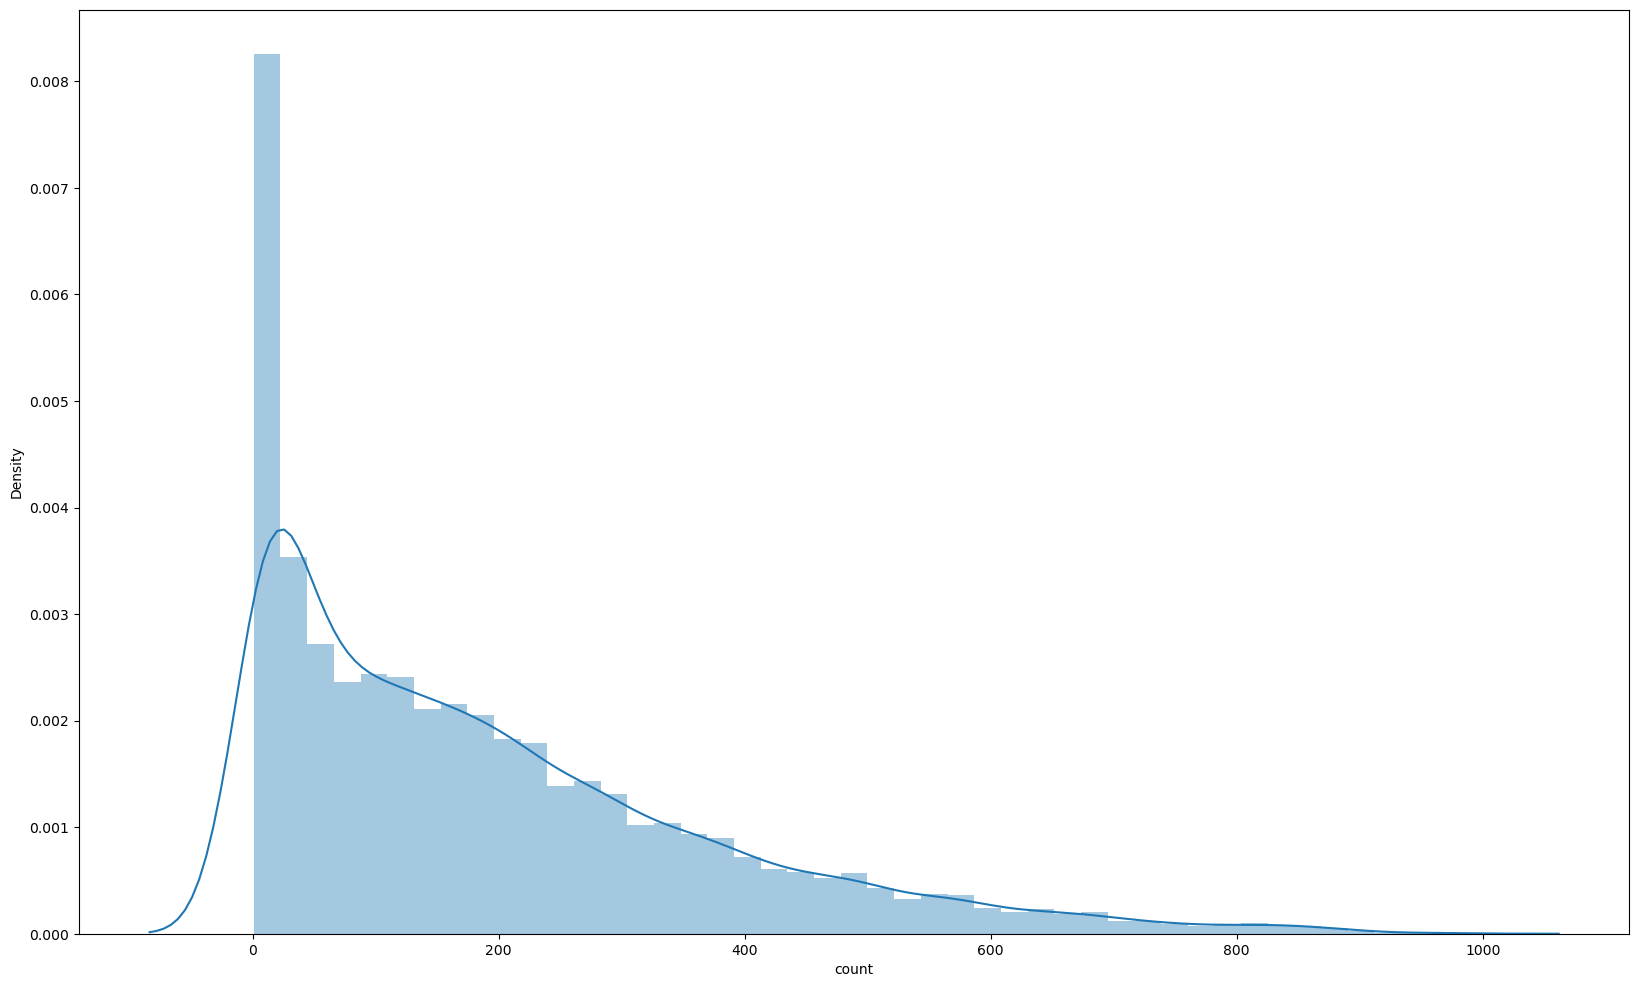

In [98]:
plt.figure(figsize=(20,12))
sns.distplot(train["count"])

/var/folders/mv/vp2nrcrd6zdgfnhyhsmvqy600000gn/T/ipykernel_43497/1115247366.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train["count"]))


<AxesSubplot: xlabel='count', ylabel='Density'>

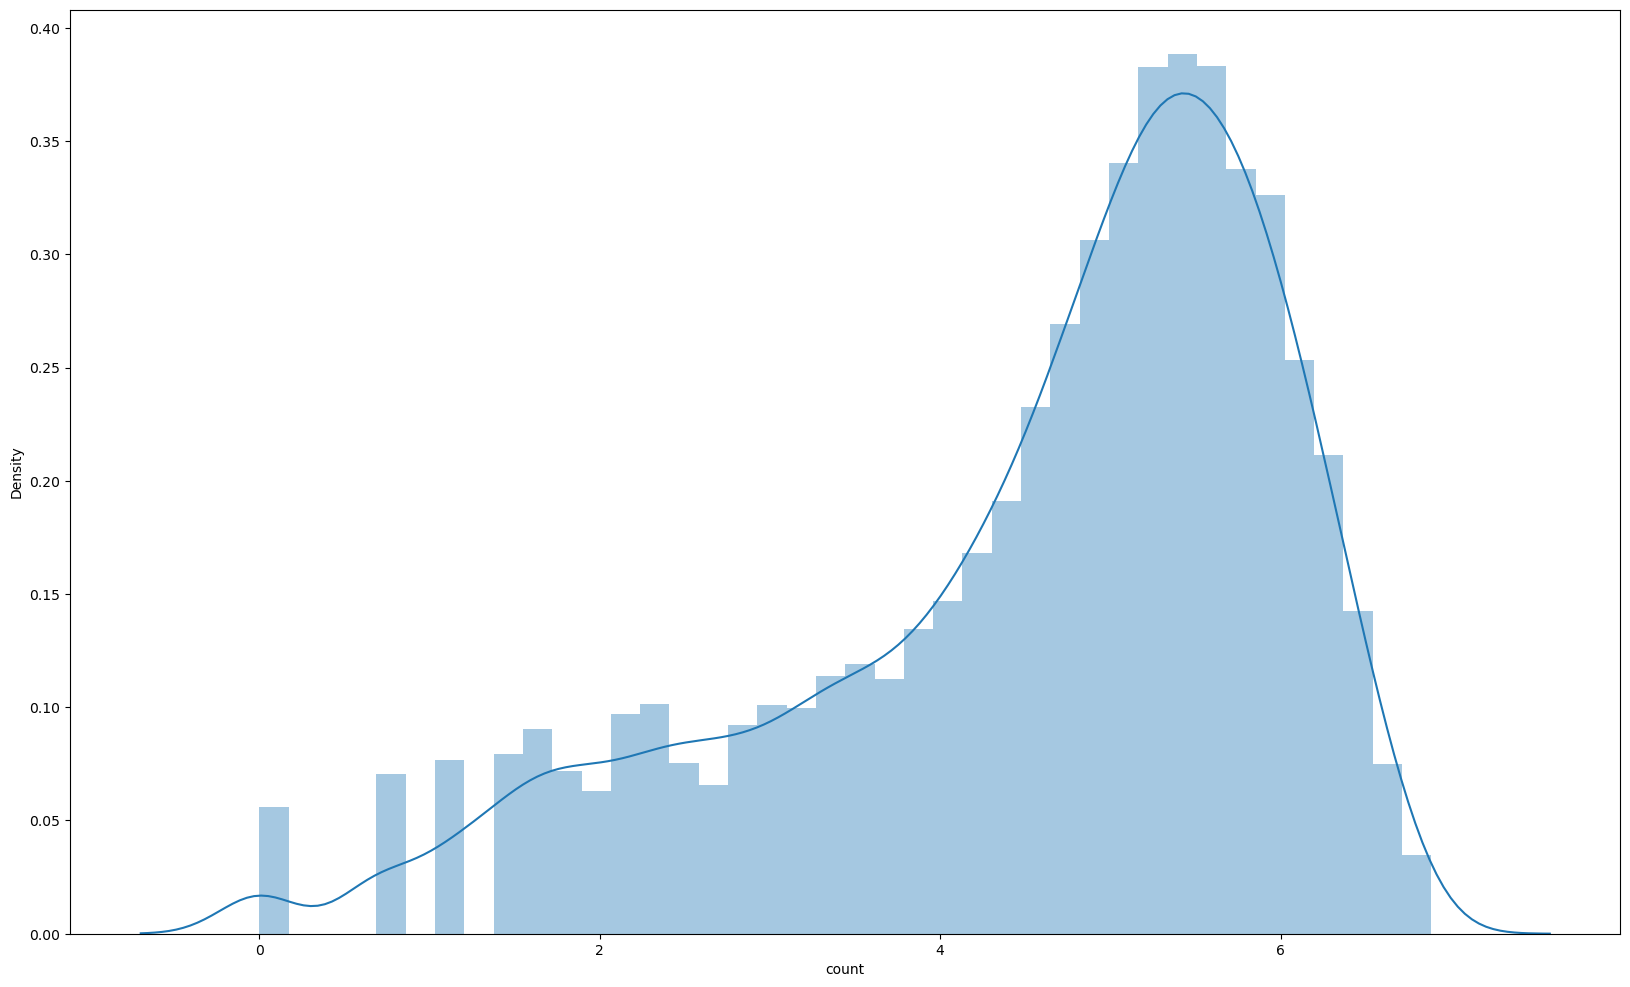

In [97]:
plt.figure(figsize=(20,12))
sns.distplot(np.log(train["count"]))

# data의 변화를 기준으로 판단

In [104]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(verbose=1)
model1.fit(train2, np.log(train["count"]))
rf_result = model1.predict(test2)

# randomforest score = 0.394

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [101]:
pd.Series(model1.feature_importances_, index = train2.columns).sort_values(ascending=False) # 결과 요약 시 사용

hour          0.755671
temp          0.046410
workingday    0.037792
season        0.036001
year          0.031287
weekday       0.029841
humidity      0.020908
atemp         0.018504
windspeed     0.011093
weather       0.011025
holiday       0.001469
dtype: float64

In [111]:
rf_result

array([2.4640455 , 1.57217439, 1.21023521, ..., 4.58500698, 4.60754311,
       3.81855497])

In [112]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,month,day,weekday
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,2011,1,20,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2011,1,20,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,2011,1,20,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,2011,1,20,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,19,2012,12,31,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,20,2012,12,31,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,21,2012,12,31,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,22,2012,12,31,0


In [114]:
sub = pd.read_csv("sampleSubmission.csv")

In [116]:
sub["count"] = np.exp(rf_result)

In [117]:
sub

,datetime,count
0,2011-01-20 00:00:00,11.752259
1,2011-01-20 01:00:00,4.817111
2,2011-01-20 02:00:00,3.354274
3,2011-01-20 03:00:00,3.663021
4,2011-01-20 04:00:00,2.707697
...,...,...
6488,2012-12-31 19:00:00,192.089997
6489,2012-12-31 20:00:00,152.138208
6490,2012-12-31 21:00:00,98.003872
6491,2012-12-31 22:00:00,100.237574


In [118]:
sub.to_csv("sub.csv", index=False)